# EEG COMPARISON OF BRAINS DURING MEDITATION VS NORMAL STATE

## LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import re

import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

import mne
%matplotlib inline
import numpy as np
mne.set_log_level('WARNING')

import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

## DATA EXPLORATION

In [ ]:
test = pd.read_csv("/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor - Normal_2020-03-06--15-40-52_1183768195786381480.csv")

In [ ]:
test.head(10)

In [ ]:
test.dtypes

In [ ]:
test.columns

In [ ]:
test.dtypes.isna().sum() #???

## DATA ACQUISITION

In [139]:
# Importing all dataframes and saving them into two different lists. 
# Associating each individual session with the name of the subject.
# Adding a column "Activity" to each dataframe. Associating the value 0 to normal state session and value 1 for meditation sessions.

import glob
path = "/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/" 
all_files = glob.glob(path + "/*.csv")

sessions_N = []
names_N = []
sessions_M = []
names_M = []

for filename in all_files:
    session = pd.read_csv(filename, index_col=None, header=0) # Reading file
    if "Normal" in filename: #Classifing as 0 if Normal Session
        session["Activity"] = 0 
        person = re.search("--\s{1}\w*\s{1}--", filename)[0].replace("--","").strip()
        names_N.append(person)
        sessions_N.append(session)
    elif "Meditative" in filename: #Classifing as 1 if Meditation Session
        session["Activity"] = 1 
        person = re.search("--\s{1}\w*\s{1}--", filename)[0].replace("--","").strip()
        names_M.append(person) 
        sessions_M.append(session)

## DATA WRANGLING

In [140]:
# Cleaning all dataframes and saving into new list:
    # dropping columns out of score
    # removing NaN values
    # computing the average of all columns referring to same brainwave (e.g: ["Delta_TP9", "Delta_AF7", "Delta_AF8", "Delta_TP10"] -> Delta)

simplified_sessions_N = []
simplified_sessions_M = []

for session in sessions_N:
    session.drop(columns = ["AUX_RIGHT", "Accelerometer_X", "Accelerometer_Y", "Accelerometer_Z","Gyro_X","Gyro_Y", "Gyro_Z","HeadBandOn", "HSI_TP9","HSI_AF7","HSI_AF8","HSI_TP10","Battery","Elements"], inplace=True)
    session.dropna(inplace = True)
    session["Delta"] = session[["Delta_TP9", "Delta_AF7", "Delta_AF8", "Delta_TP10"]].mean(axis=1)
    session["Theta"] = session[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
    session["Alpha"] = session[['Alpha_TP9','Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
    session["Beta"] = session[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
    session["Gamma"] = session[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8','Gamma_TP10']].mean(axis=1)
    
    simplified_session = session[["Delta", "Theta", "Alpha", "Beta", "Gamma", "Activity"]]
    simplified_sessions_N.append(simplified_session) 
    
for session in sessions_M:
    session.drop(columns = ["AUX_RIGHT", "Accelerometer_X", "Accelerometer_Y", "Accelerometer_Z","Gyro_X","Gyro_Y", "Gyro_Z","HeadBandOn", "HSI_TP9","HSI_AF7","HSI_AF8","HSI_TP10","Battery","Elements"], inplace=True)
    session.dropna(inplace = True)
    session["Delta"] = session[["Delta_TP9", "Delta_AF7", "Delta_AF8", "Delta_TP10"]].mean(axis=1)
    session["Theta"] = session[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
    session["Alpha"] = session[['Alpha_TP9','Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
    session["Beta"] = session[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
    session["Gamma"] = session[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8','Gamma_TP10']].mean(axis=1)
    
    simplified_session = session[["TimeStamp", "Delta", "Theta", "Alpha", "Beta", "Gamma", "Activity"]]
    simplified_sessions_M.append(simplified_session)
    

### Summarizing the data into two dataframe that contains, respectively, the mean of each brainwave frequencies at each datapoint(timestamp) of all meditation and normal state sessions. 

In [137]:
df_concat = pd.concat((simplified_sessions_N[i] for i in range(len(simplified_sessions_N))))
by_row_index = df_concat.groupby(df_concat.index)
df_normal_means = by_row_index.mean().reset_index(drop=True)
df_normal_means

Delta     Theta     Alpha      Beta     Gamma  Activity
0    0.576456  0.400454  0.469737  0.375480  0.125523         0
1    0.587737  0.321154  0.449459  0.425146  0.173881         0
2    0.479416  0.539042  0.547665  0.400437  0.137122         0
3    0.166476  0.118457  0.142470  0.146865 -0.069498         0
4    0.639132  0.425134  0.468532  0.440830  0.163055         0
..        ...       ...       ...       ...       ...       ...
848  0.592204  0.629364  0.695148  0.664153  0.466014         0
849  0.592204  0.629364  0.695148  0.664153  0.466014         0
850  0.592204  0.629364  0.695148  0.664153  0.466014         0
851  0.592204  0.629364  0.695148  0.664153  0.466014         0
852  0.592204  0.629364  0.695148  0.664153  0.466014         0

[853 rows x 6 columns]

In [138]:
df_concat = pd.concat((simplified_sessions_M[i] for i in range(len(simplified_sessions_M))))
by_row_index = df_concat.groupby(df_concat.index)
df_meditation_means = by_row_index.mean().reset_index(drop=True)
df_meditation_means

Delta     Theta     Alpha      Beta     Gamma  Activity
0    0.468994  0.238025  0.445613  0.266148 -0.043680         1
1    0.406068  0.272445  0.486336  0.251400 -0.044371         1
2    0.517205  0.301492  0.461965  0.369813  0.061695         1
3    0.335218  0.132883  0.328254  0.206435 -0.068968         1
4    0.444095  0.223917  0.416971  0.242722 -0.074854         1
..        ...       ...       ...       ...       ...       ...
681 -0.089825 -0.233133 -0.020393 -0.211648 -0.449388         1
682 -0.019864 -0.459459  0.028204 -0.174764 -0.348988         1
683 -0.381018 -0.371906  0.022115 -0.165488 -0.420029         1
684  0.023797 -0.395403 -0.029497 -0.200197 -0.369676         1
685  0.000131 -0.351881  0.010698 -0.215428 -0.474374         1

[686 rows x 6 columns]

## DATA ANALYSIS

In [278]:
brainwaves = ["Delta", "Theta", "Alpha","Beta", "Gamma"]  
colors = ["Red", "Orange", "Yellow", "Green", "Blue"]
wave_to_color = dict(zip(brainwaves, colors)) #Color-coding each brainwave

In [275]:
def multiline_waves1(dataframe1, dataframe2, name=""):
    
    """The function generates a multi-line plot of all the brainwaves"""
    """Always insert normal as df1 and meditative as df2"""
    
    brainwaves = ["Delta", "Theta", "Alpha","Beta", "Gamma"]  
    colors = ["Red", "Orange", "Yellow", "Green", "Blue"]
    wave_to_color = dict(zip(brainwaves, colors)) #Color-coding each brainwave
    
    x_norm = dataframe1.index #dataframe["TimeStamp"]
    x_med = dataframe2.index 
    df_norm = dataframe1[["Delta", "Theta", "Alpha","Beta", "Gamma"]]
    df_med = dataframe2[["Delta", "Theta", "Alpha","Beta", "Gamma"]]
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    num=0
    for brainwave in brainwaves:
        num+=1
        ax[0].plot(x_norm, df_norm[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
    
    for brainwave in brainwaves:
        num+=1
        ax[1].plot(x_med, df_med[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
    
    plt.legend(fontsize=15)
    ax[0].set_title("EGG Brainwaves Normal " + name, loc='left', fontsize=20, fontweight=1, color='black')
    ax[1].set_title("EGG Brainwaves Meditation " + name, loc='left', fontsize=20, fontweight=1, color='black')
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("EGG", fontsize=15)
    plt.ylim([-1,1.5])

        
def line_wave1(dataframe1, dataframe2):
    
    """The function shows graphically the pattern of each brainwave in the session"""
    """Always insert normal as df1 and meditative as df2"""
    
    x_norm = dataframe1.index
    x_med = dataframe2.index 
    df_norm = dataframe1[["Delta", "Theta", "Alpha","Beta", "Gamma"]]
    df_med = dataframe2[["Delta", "Theta", "Alpha","Beta", "Gamma"]]
    fig, ax = plt.subplots(5, 2, figsize=(20, 20))
    
    for i in range(len(brainwaves)):
        brainwave = brainwaves[i]
        ax[i][0].plot(x_norm, df_norm[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
        ax[i][1].plot(x_med, df_med[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
        ax[i][0].set_xlabel("time", fontsize=15)
        ax[i][1].set_xlabel("time", fontsize=15)
        ax[i][0].set_ylabel(f"({brainwave}, Normal)", fontsize=15)
        ax[i][1].set_ylabel(f"({brainwave}, Meditation)", fontsize=15)
        ax[i][0].set_ylim([-1,1.5])
        ax[i][1].set_ylim([-1,1.5])

    plt.show()

#add savefig

In [248]:
def multiline_waves(dataframe, name=""):
    
    """The function generates a multi-line plot of all the brainwaves"""
    
    x = dataframe.index #dataframe["TimeStamp"]
    df = dataframe[["Delta", "Theta", "Alpha","Beta", "Gamma"]]

    plt.figure(figsize=(20,10))
    num=0
    for brainwave in brainwaves:
        num+=1
        plt.plot(x, df[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
    
    plt.legend(fontsize=15)
    plt.title("EGG Brainwaves " + name, loc='left', fontsize=20, fontweight=1, color='black')
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("EGG", fontsize=15)
    plt.ylim([-1,1.5])


def histogram_qq_waves(dataframe):
  
    """The function shows graphically the distribution of each brainwave"""
    
    for brainwave in brainwaves:
        plt.figure(brainwave)
        sns.distplot(dataframe[brainwave], color=wave_to_color.get(brainwave))
        #qqplot(pd.DataFrame(dataframe[brainwave]))
        

def line_wave(dataframe, state):
    
    """The function shows graphically the pattern of each brainwave in the session"""
    
    x = dataframe.index #dataframe["TimeStamp"]
    df = dataframe[["Delta", "Theta", "Alpha","Beta", "Gamma"]]

    for brainwave in brainwaves:
        plt.plot(x, df[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
        plt.title(f"{brainwave, state}") 
        plt.xlabel("time", fontsize = 10)
        plt.ylabel(f"{brainwave}", fontsize = 10)
        plt.ylim([-1,1.5])
        plt.show()

### INDIVIDUAL DATA ANALYSIS

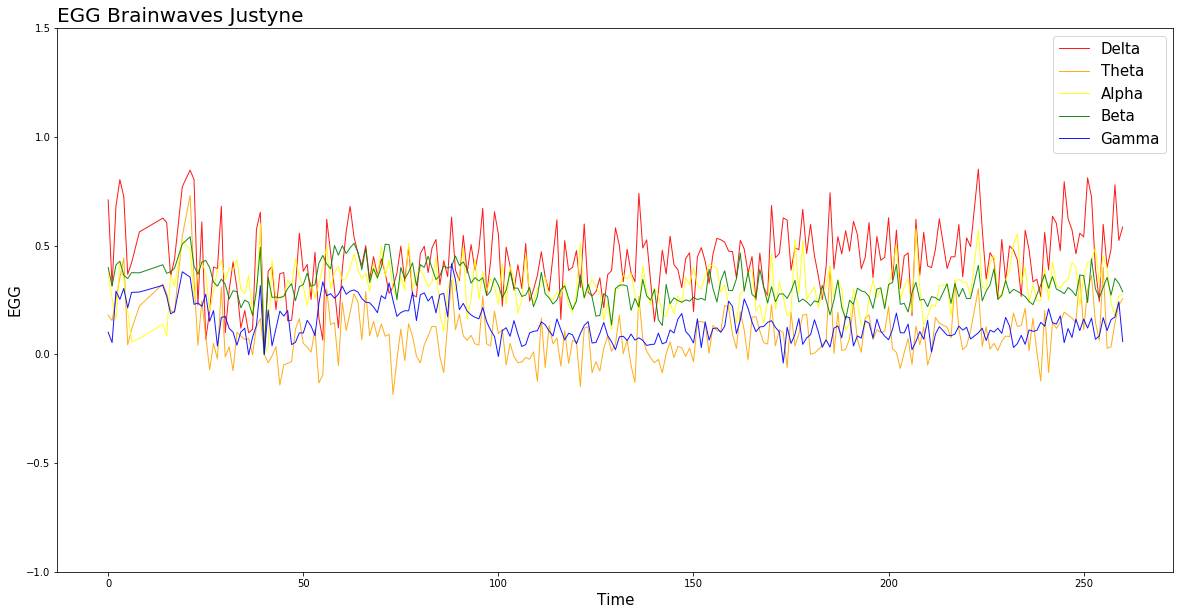

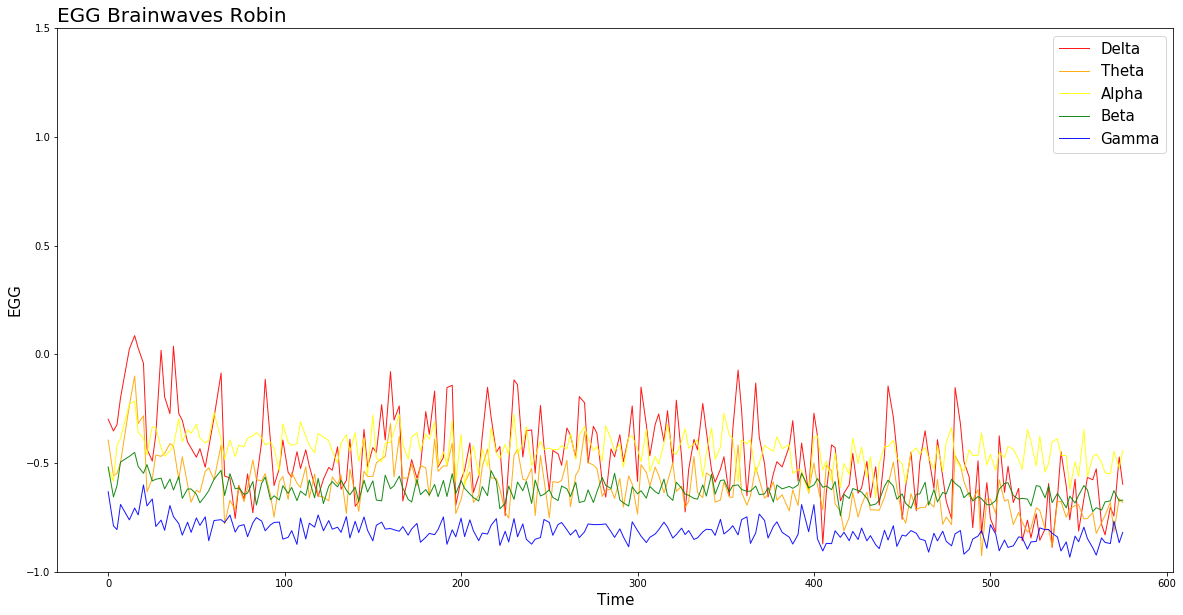

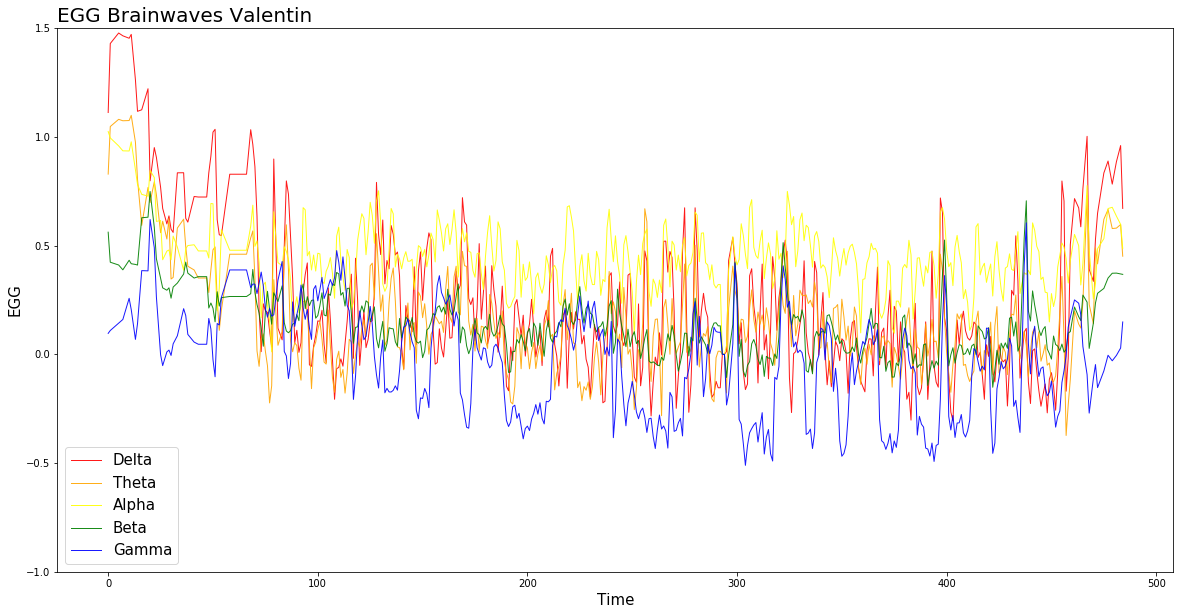

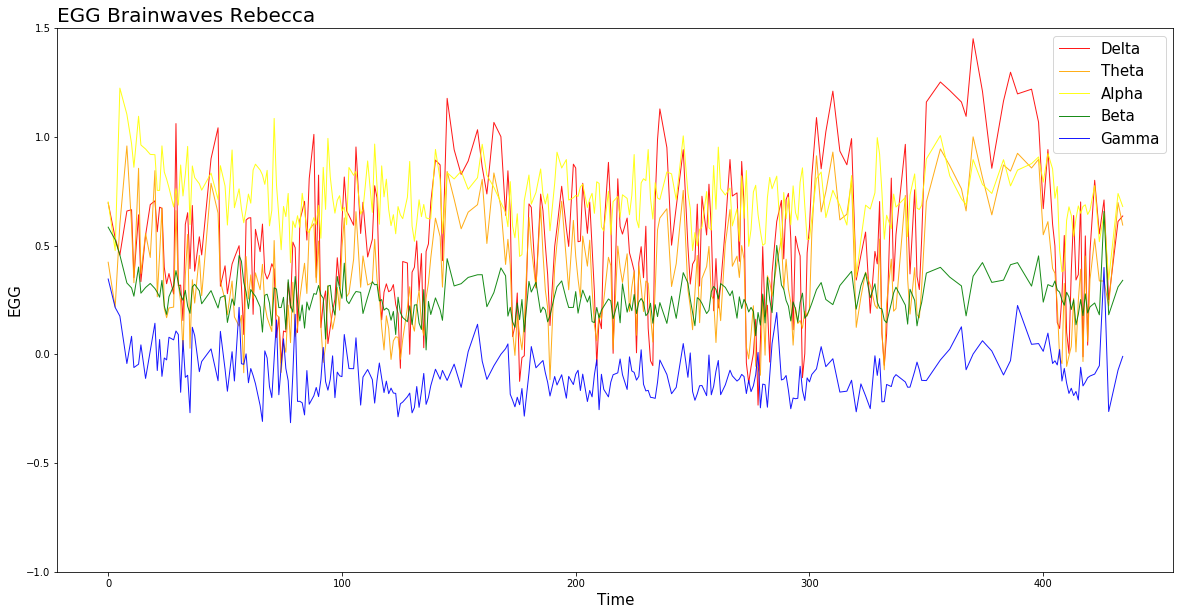

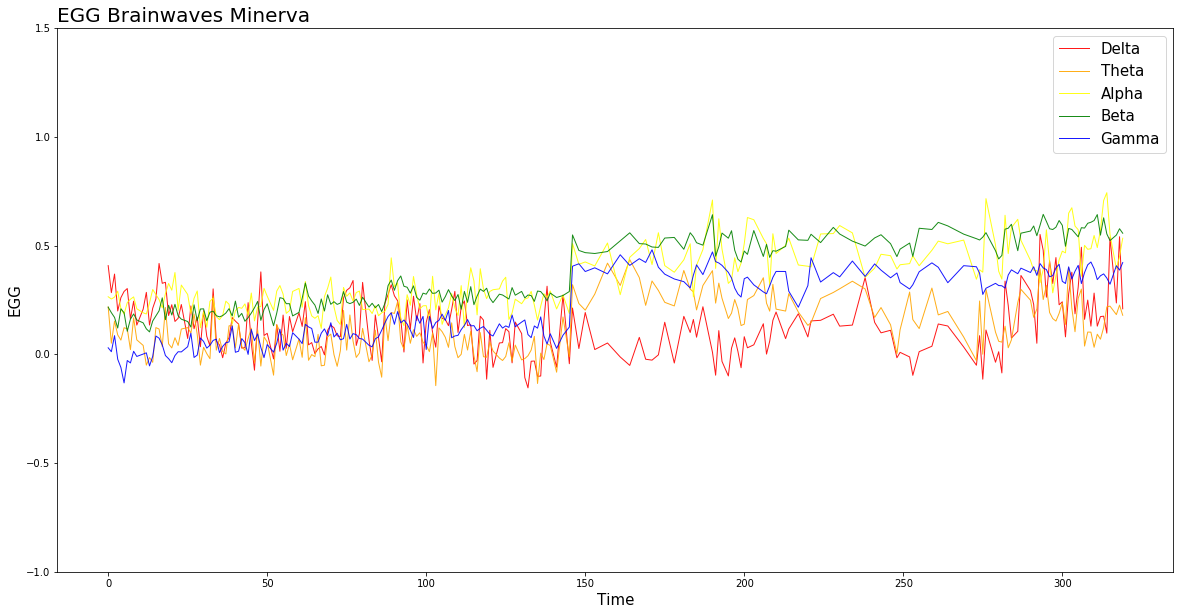

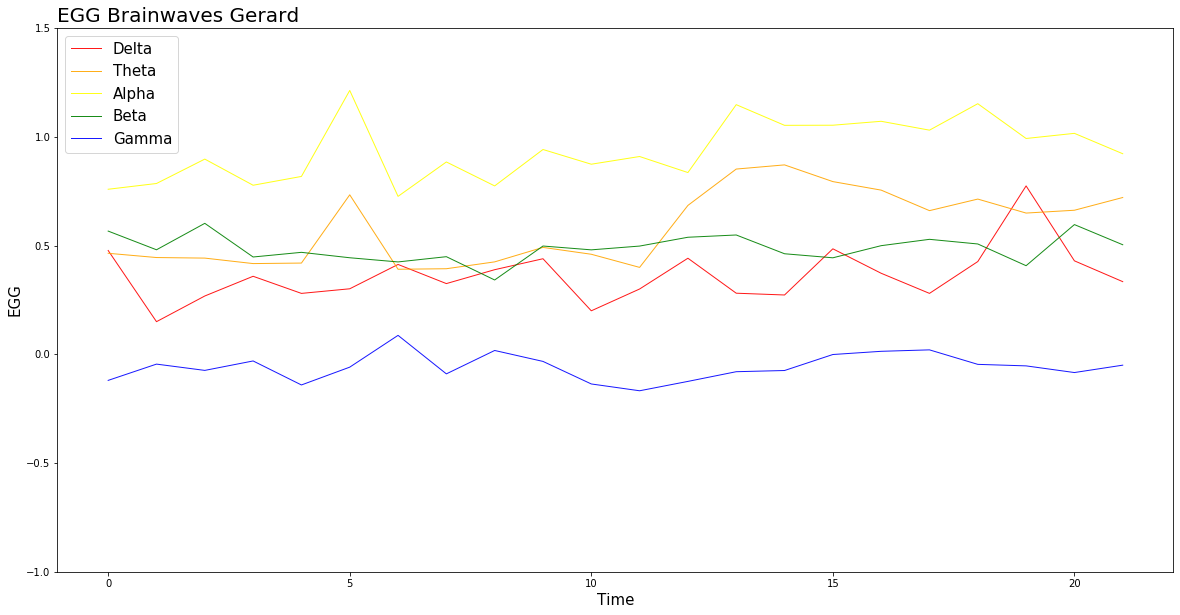

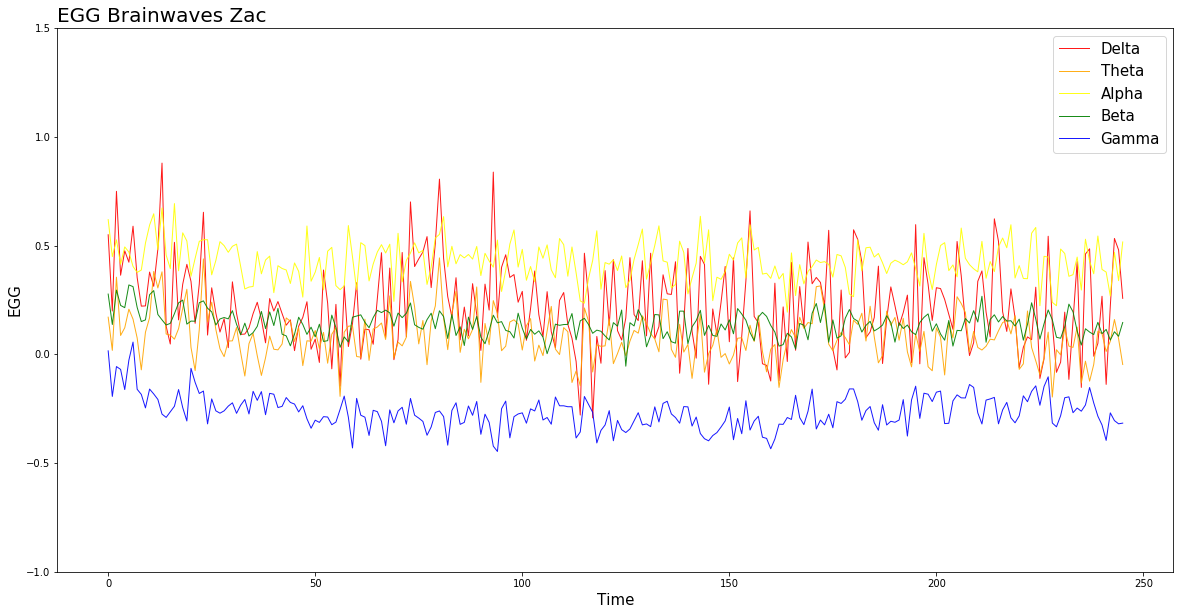

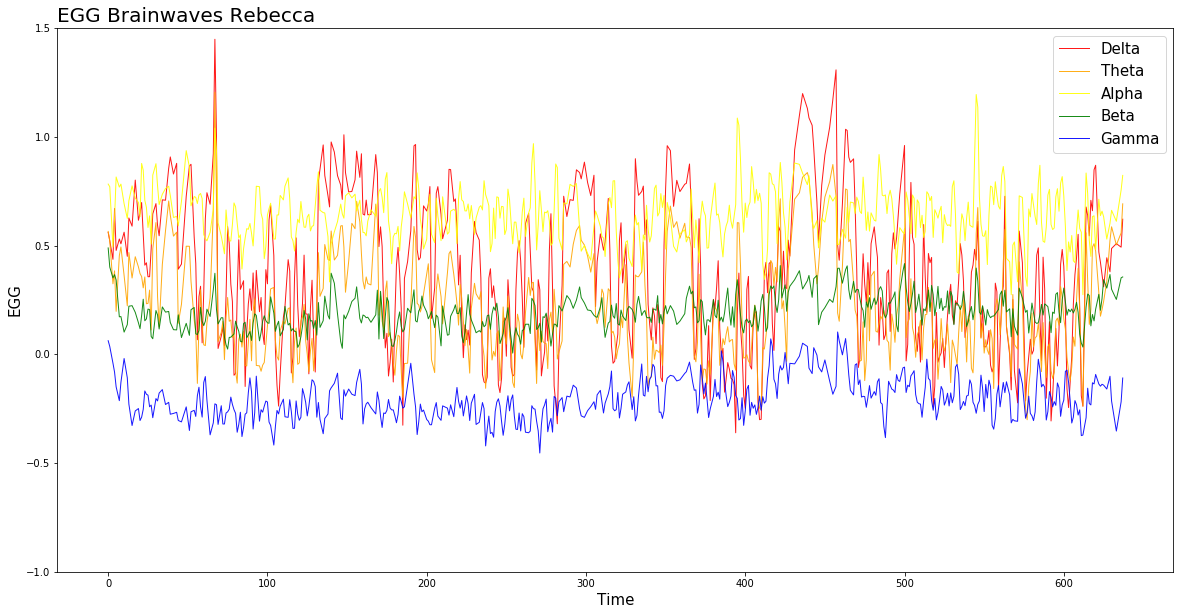

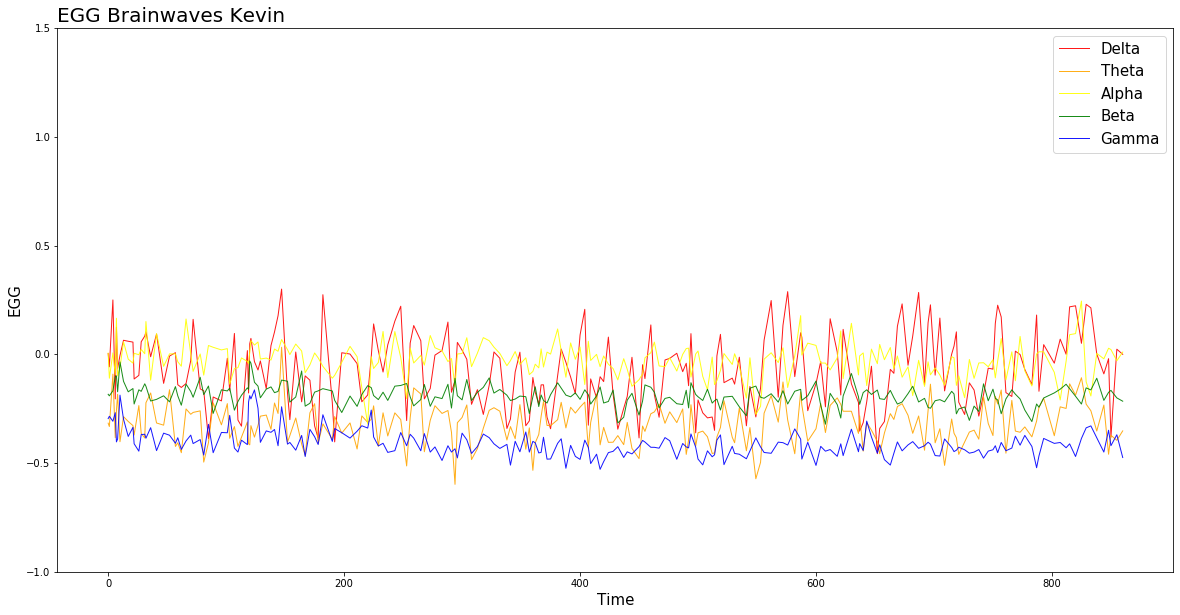

In [224]:
for dataframe, name in zip(simplified_sessions_M,names_M):
    multiline_waves(dataframe, name)

In [225]:
for dataframe, name in zip(simplified_sessions_M,names_M):
    print(name, dataframe.describe())

Justyne             Delta       Theta       Alpha        Beta       Gamma  Activity
count  251.000000  251.000000  251.000000  251.000000  251.000000     251.0
mean     0.439317    0.091993    0.312280    0.313468    0.142206       1.0
std      0.154692    0.121922    0.101663    0.079416    0.081769       0.0
min      0.000000   -0.184472    0.000000    0.000000   -0.039963       1.0
25%      0.344518    0.010543    0.252227    0.257560    0.084942       1.0
50%      0.444829    0.081544    0.308996    0.302999    0.122524       1.0
75%      0.538002    0.150222    0.374618    0.364773    0.190354       1.0
max      0.851603    0.730393    0.601640    0.540634    0.416784       1.0
Robin             Delta       Theta       Alpha        Beta       Gamma  Activity
count  228.000000  228.000000  228.000000  228.000000  228.000000     228.0
mean    -0.472502   -0.610780   -0.437088   -0.626995   -0.813194       1.0
std      0.194648    0.116234    0.077092    0.046261    0.050218       0.

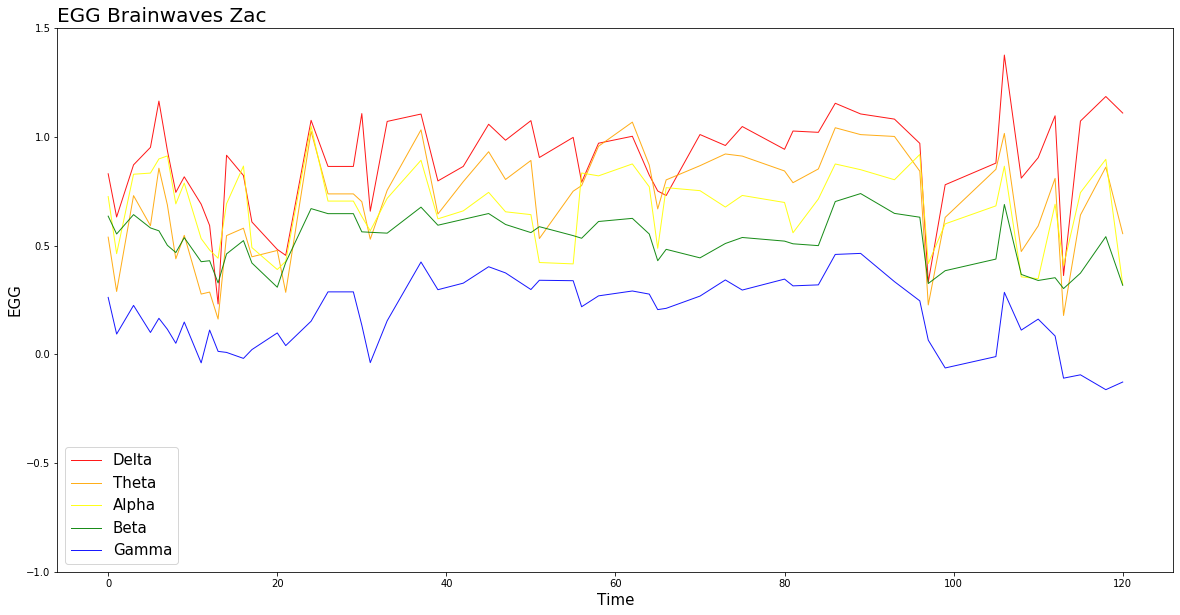

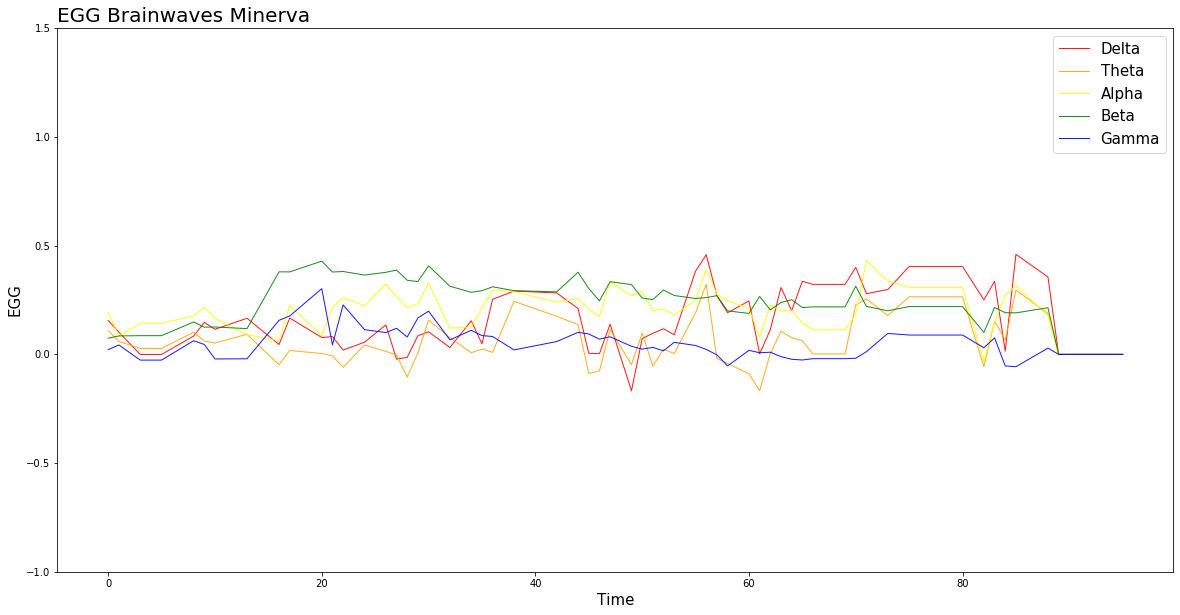

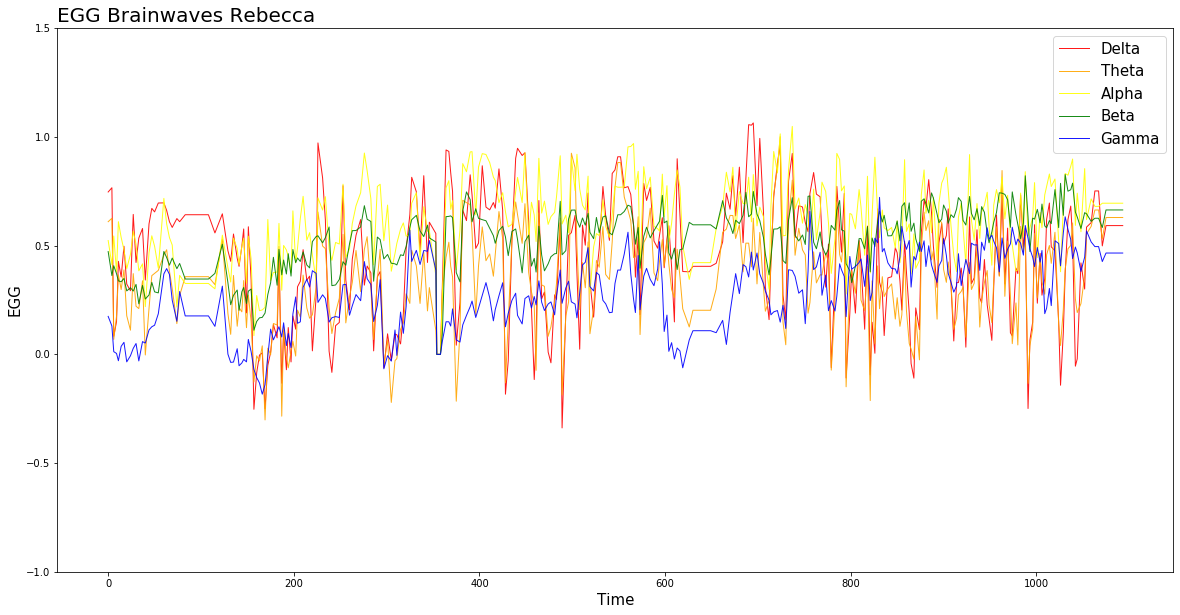

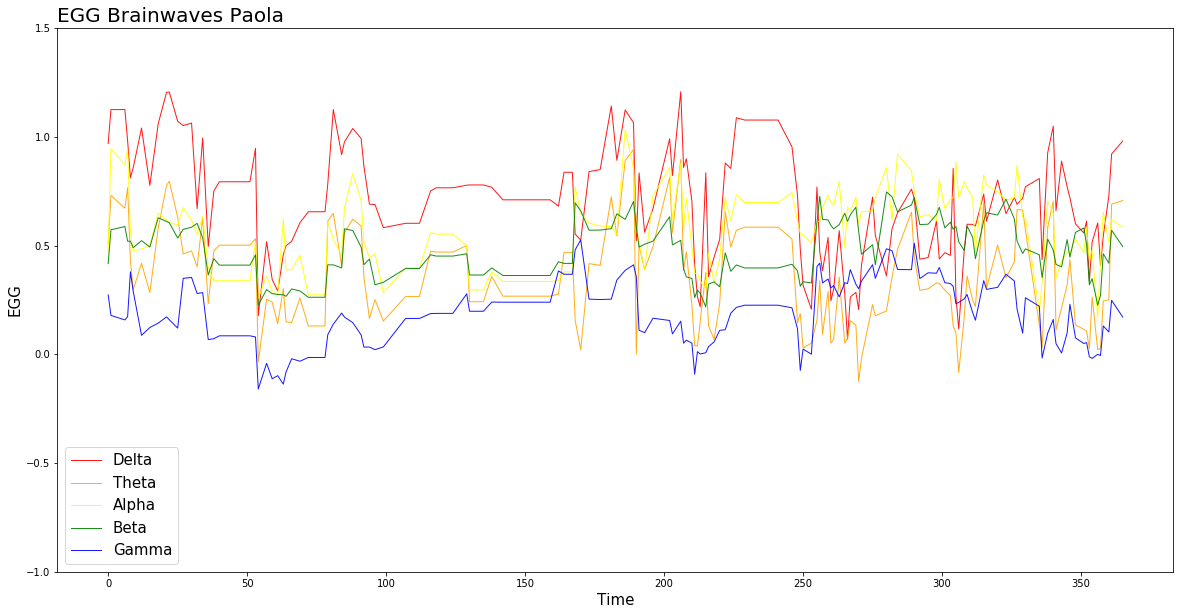

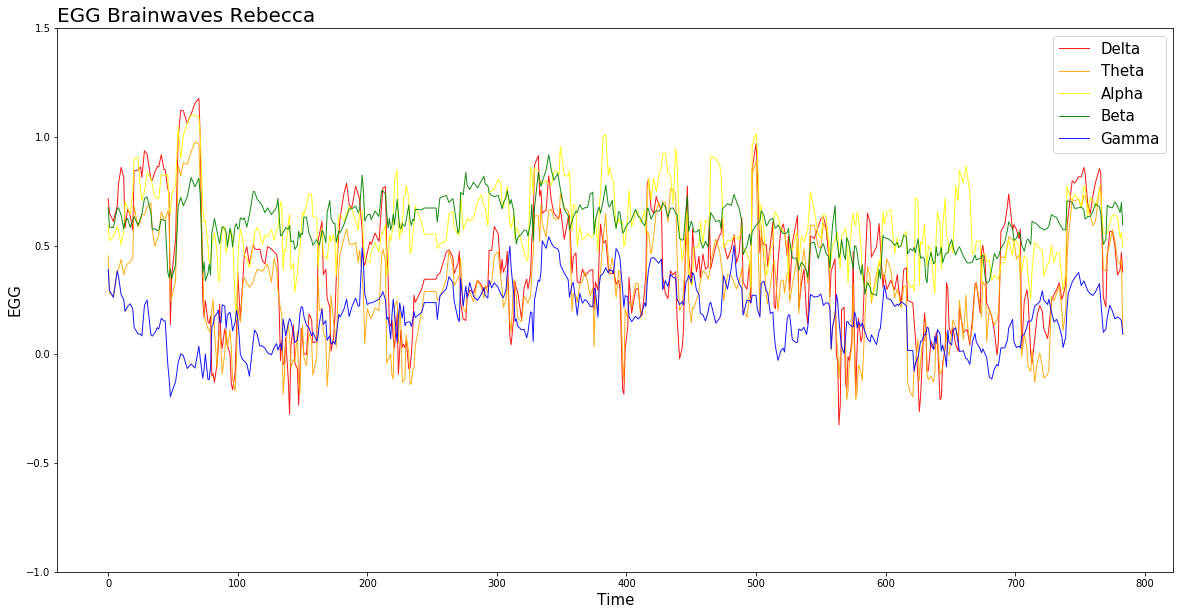

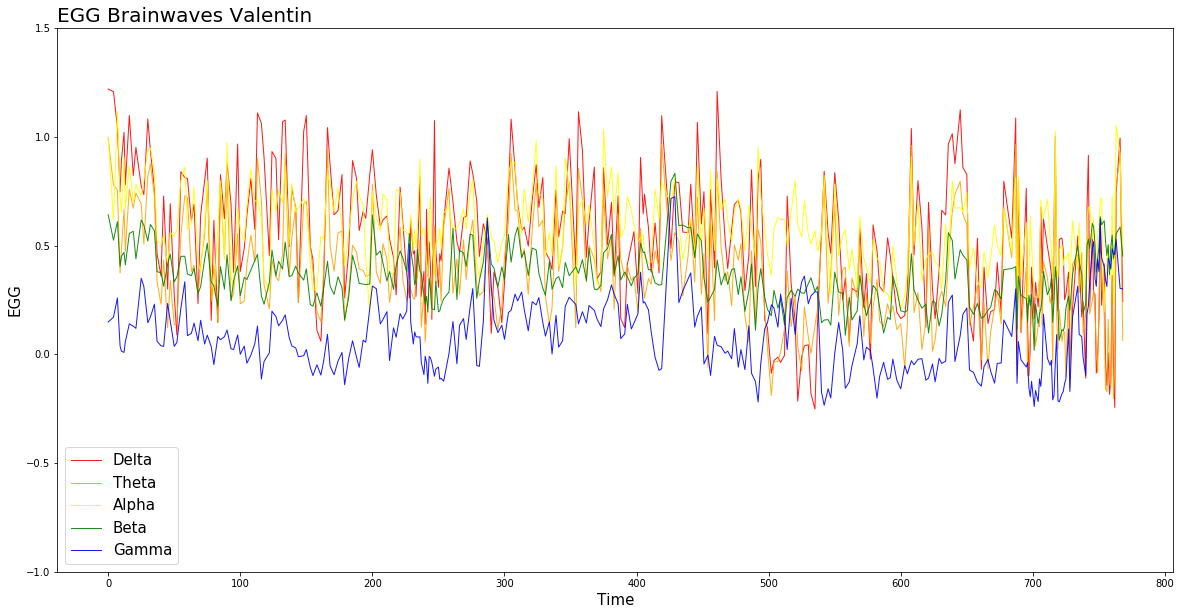

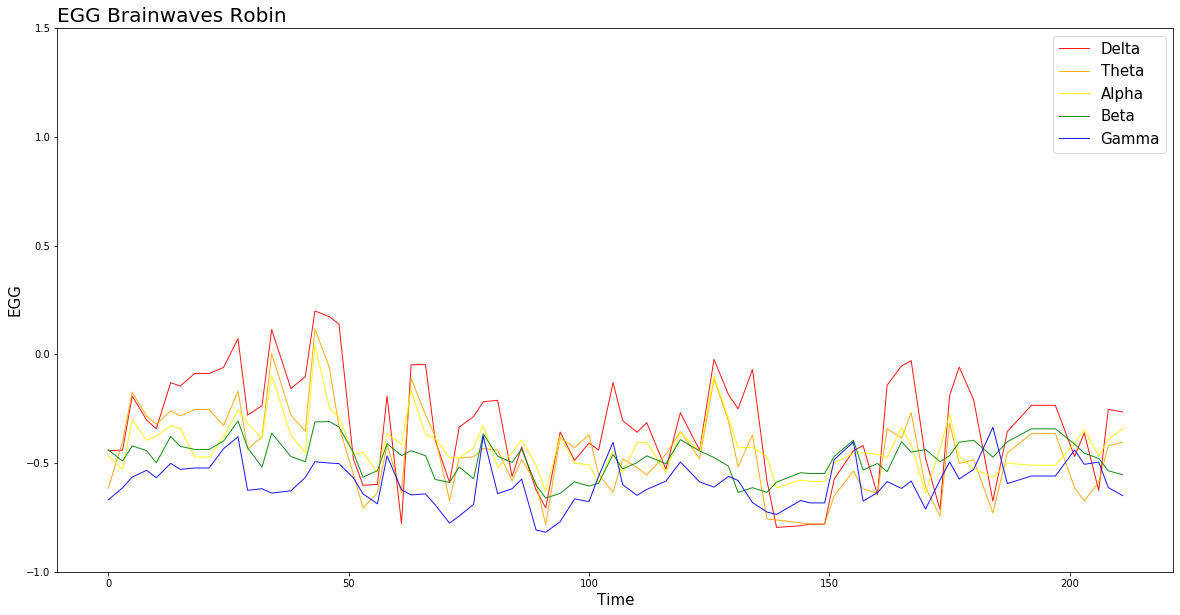

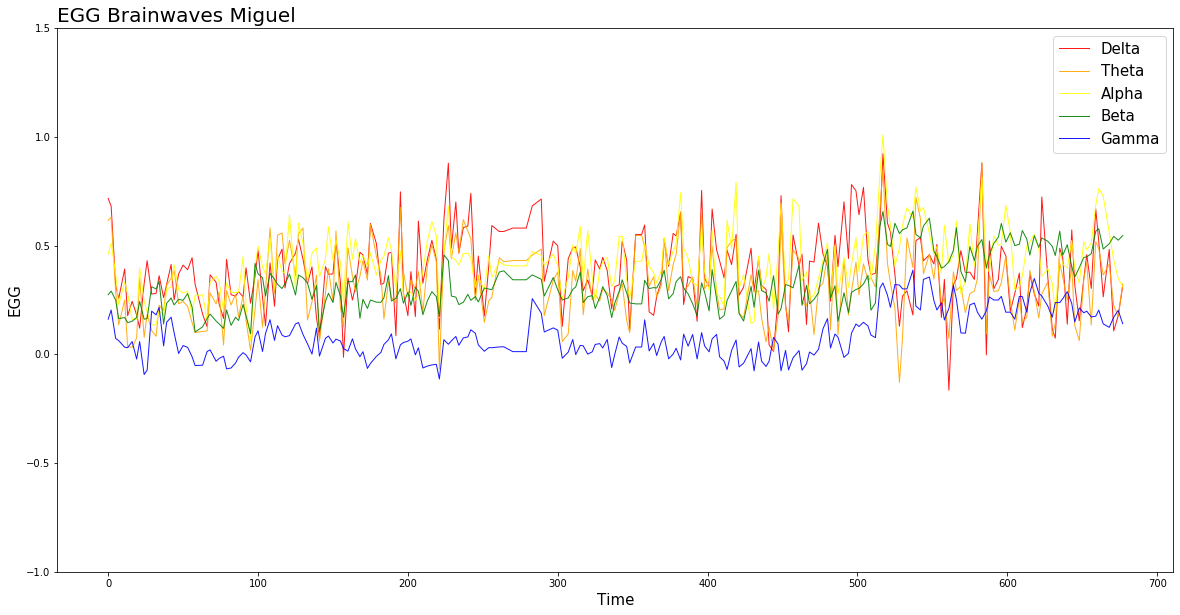

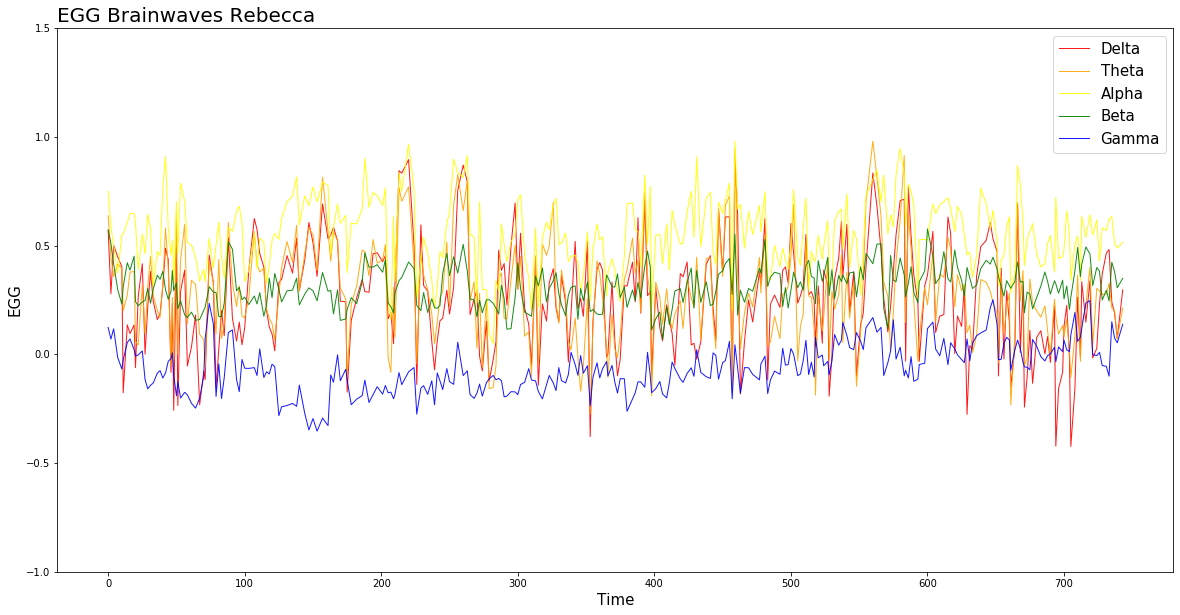

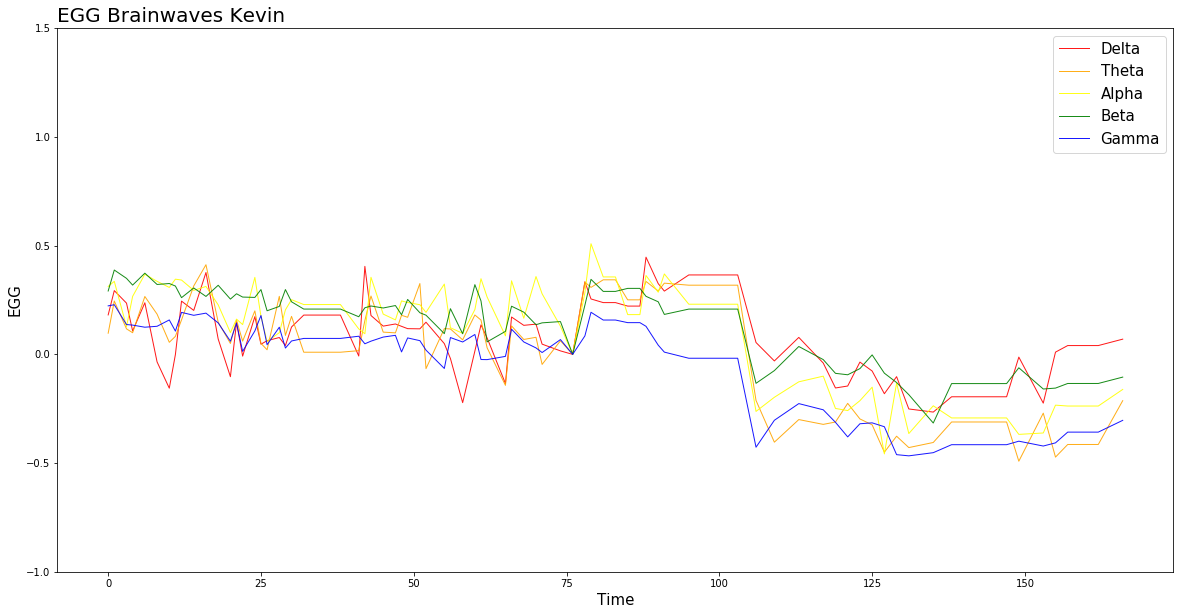

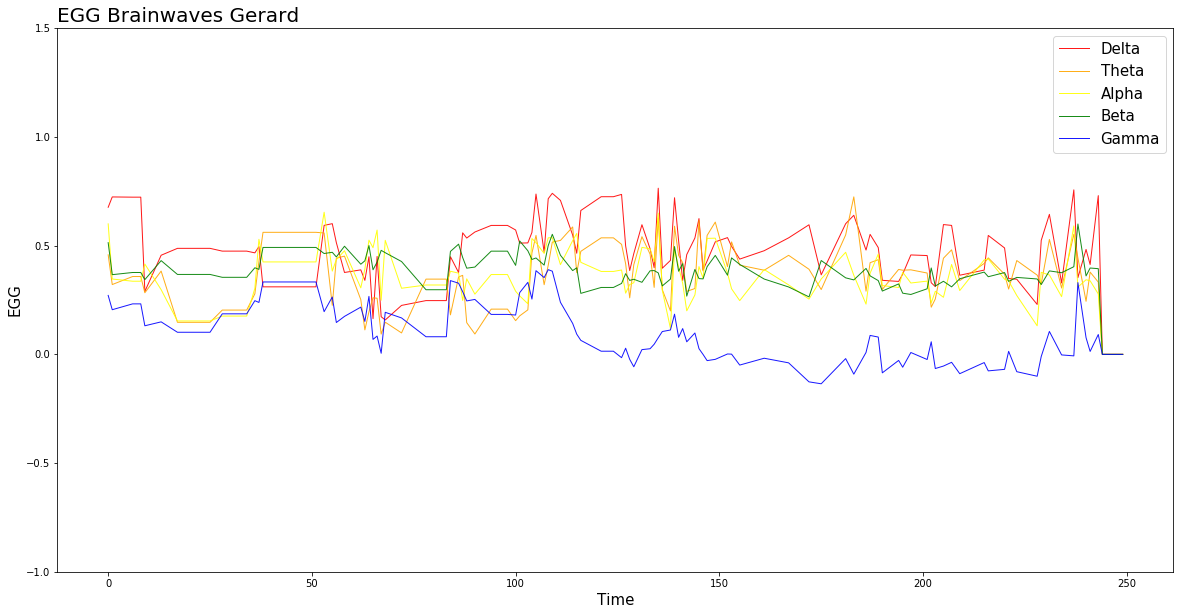

In [226]:
for dataframe, name in zip(simplified_sessions_N,names_N):
    multiline_waves(dataframe, name)

In [227]:
for dataframe, name in zip(simplified_sessions_N,names_N):
    print(name, dataframe.describe())

Zac            Delta      Theta      Alpha       Beta      Gamma  Activity
count  57.000000  57.000000  57.000000  57.000000  57.000000      57.0
mean    0.885729   0.696065   0.673108   0.521048   0.178770       0.0
std     0.226193   0.238083   0.177491   0.113497   0.158311       0.0
min     0.231758   0.162307   0.321016   0.302648  -0.162395       0.0
25%     0.791604   0.546126   0.532205   0.430793   0.065327       0.0
50%     0.915734   0.737967   0.698498   0.537490   0.205776       0.0
75%     1.058217   0.860975   0.820918   0.611035   0.297309       0.0
max     1.376448   1.068076   1.049437   0.739494   0.464329       0.0
Minerva            Delta      Theta      Alpha       Beta      Gamma  Activity
count  64.000000  64.000000  64.000000  64.000000  64.000000      64.0
mean    0.154559   0.058601   0.191704   0.227298   0.047319       0.0
std     0.147284   0.108077   0.106429   0.117147   0.069619       0.0
min    -0.167563  -0.167248  -0.032558   0.000000  -0.056851     

> By plotting the individual brainwaves above, I was able to find and remove the sessions that contained bad data (e.g. failures of the handset) and produced noise. I can use the descriptive statistics to perform and in-depth analysis .

##### INDIVIDUAL BRAINWAVES BEHAVIOUR: NORMAL VS MEDITATIVE STATE

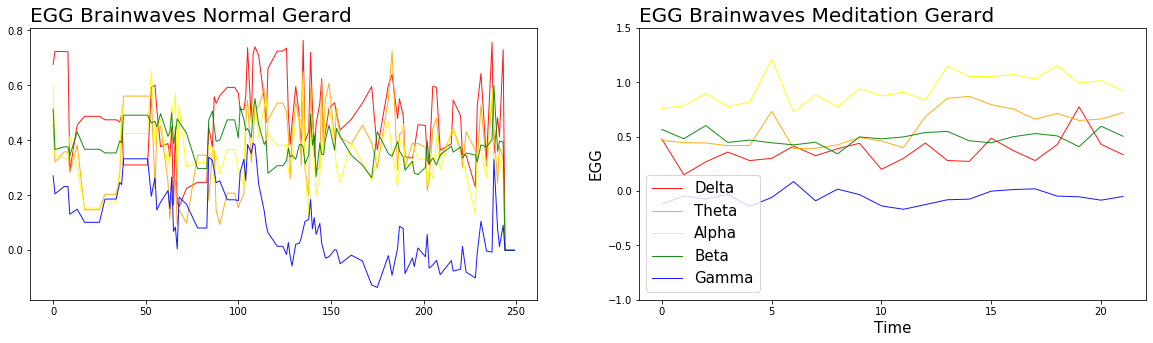

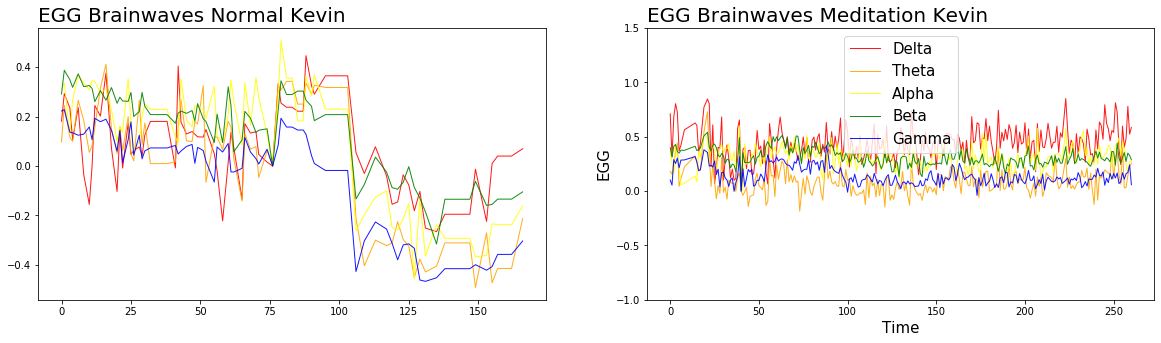

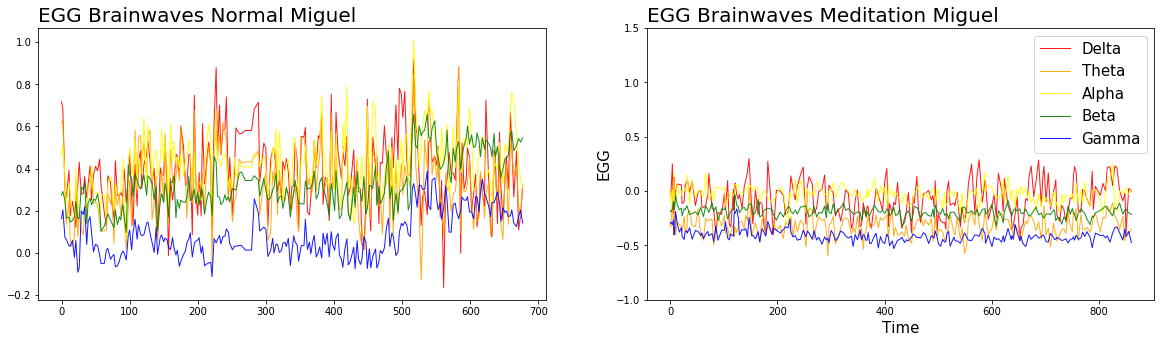

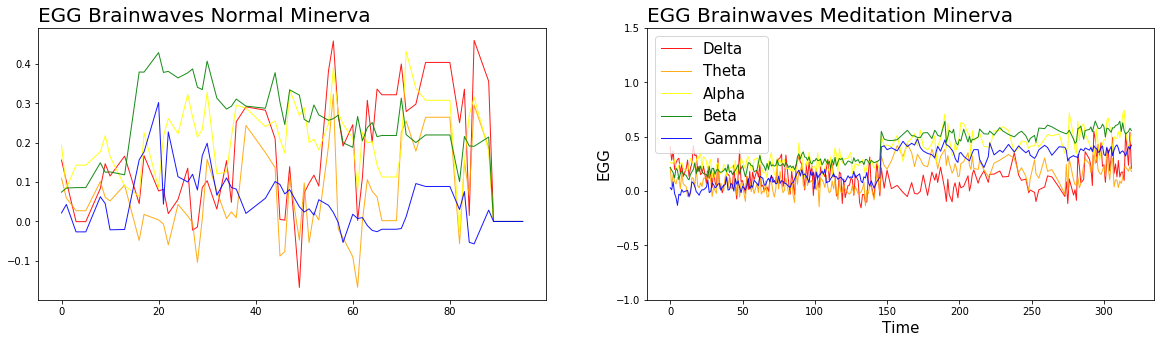

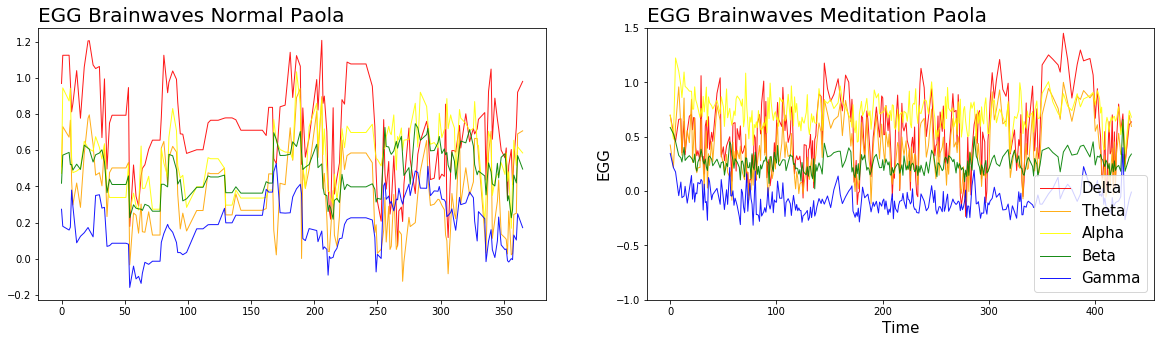

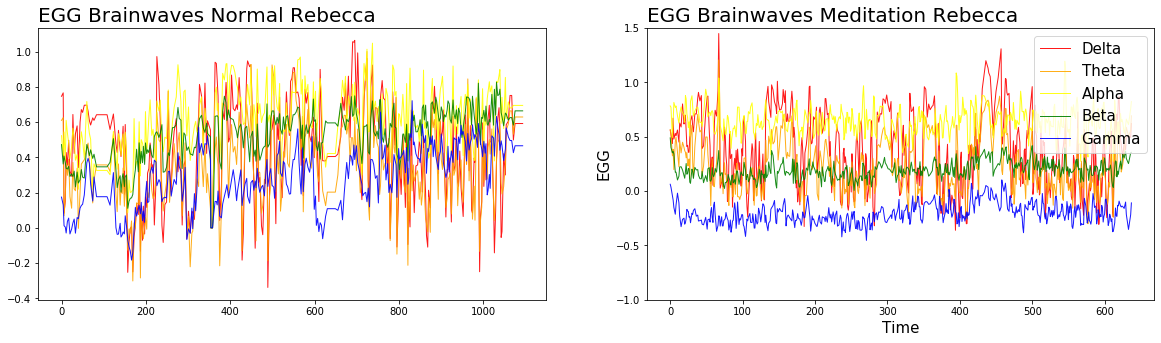

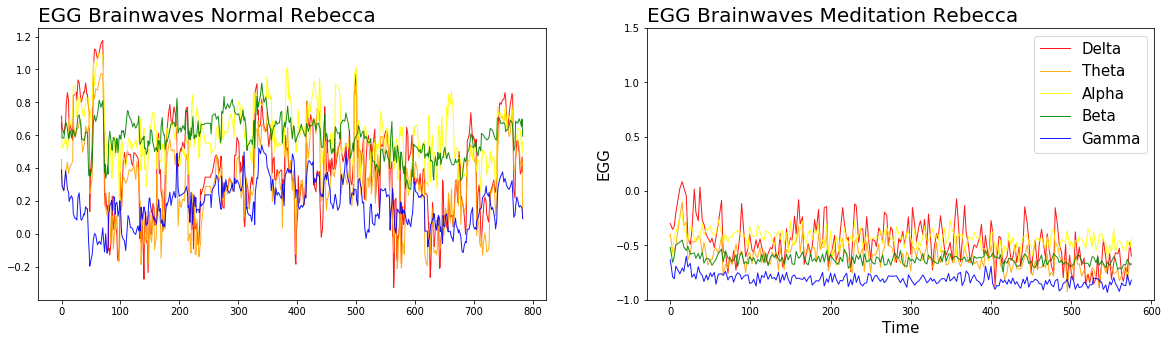

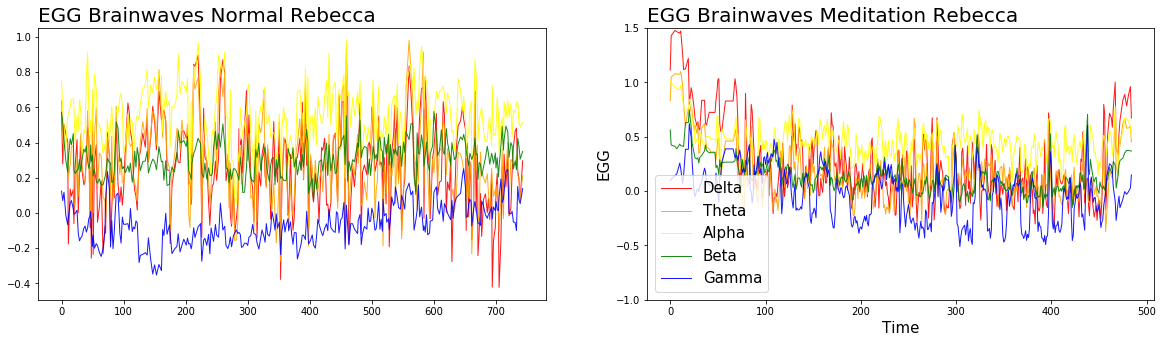

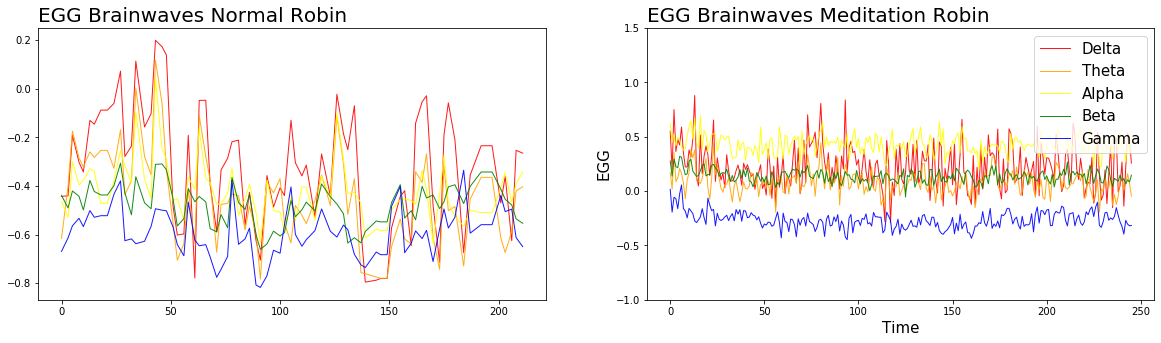

In [239]:
norm = sorted(zip(simplified_sessions_N,names_N), key= lambda x: x[1])
med = sorted(zip(simplified_sessions_M,names_M), key= lambda x: x[1])
##### ALL BRAINWAVES BEHAVIOUR: NORMAL VS MEDITATIVE STATE
for n, m in zip(norm, med):
    multiline_waves1(n[0], m[0], n[1])

### AGGREGATE DATA ANALYSIS

##### AGG BRAINWAVES BEHAVIOUR: NORMAL VS MEDITATIVE STATE

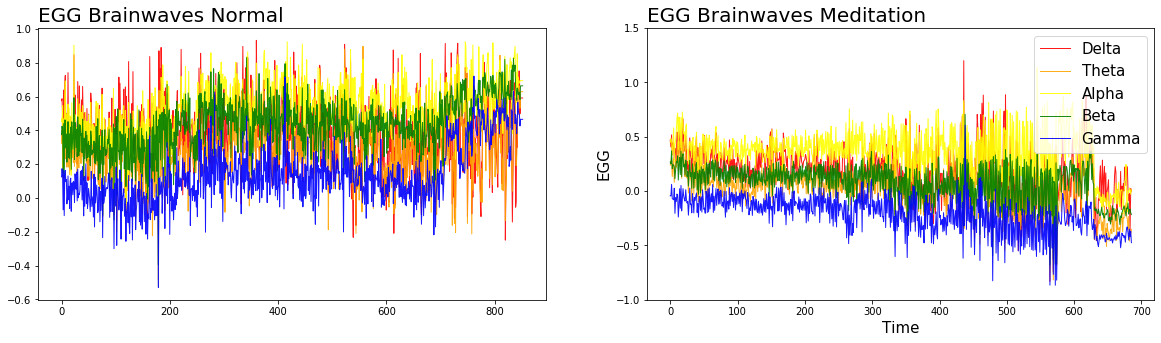

In [240]:
multiline_waves1(df_normal_means,df_meditation_means)

###### CONCLUSIONS:

> Observation 1: The average brain frequencies on a normal state range between 0 and 1 whiile the frequencies during meditation range from -0.5 and 0.5. What seems to be noise at the end, it is actually a real drop in brain frequency after about 5 minutes of meditation.
    

> Observation 2: We can see that Alpha Waves during meditation sessions clearly predominates over the other waves. At the same, beta waves, which are indicators of fast mental activity register lower values. When Alpha predominates most people feel at ease and calm. While Hi-Beta (Beta3, 22-38Hz) is highly complex thought, integrating new experiences, high anxiety, or excitement. Continual high frequency processing is not a very efficient way to run the brain, as it takes a tremendous amount of energy. 

> Observation 3: Alpha waves in meditation have also higher amplitude (the distance between two peaks of a wave) during meditation. This refers to slow activity and indicates--?

#### SINGLE BRAINWAVES BEHAVIOUR: NORMAL VS MEDITATIVE STATE

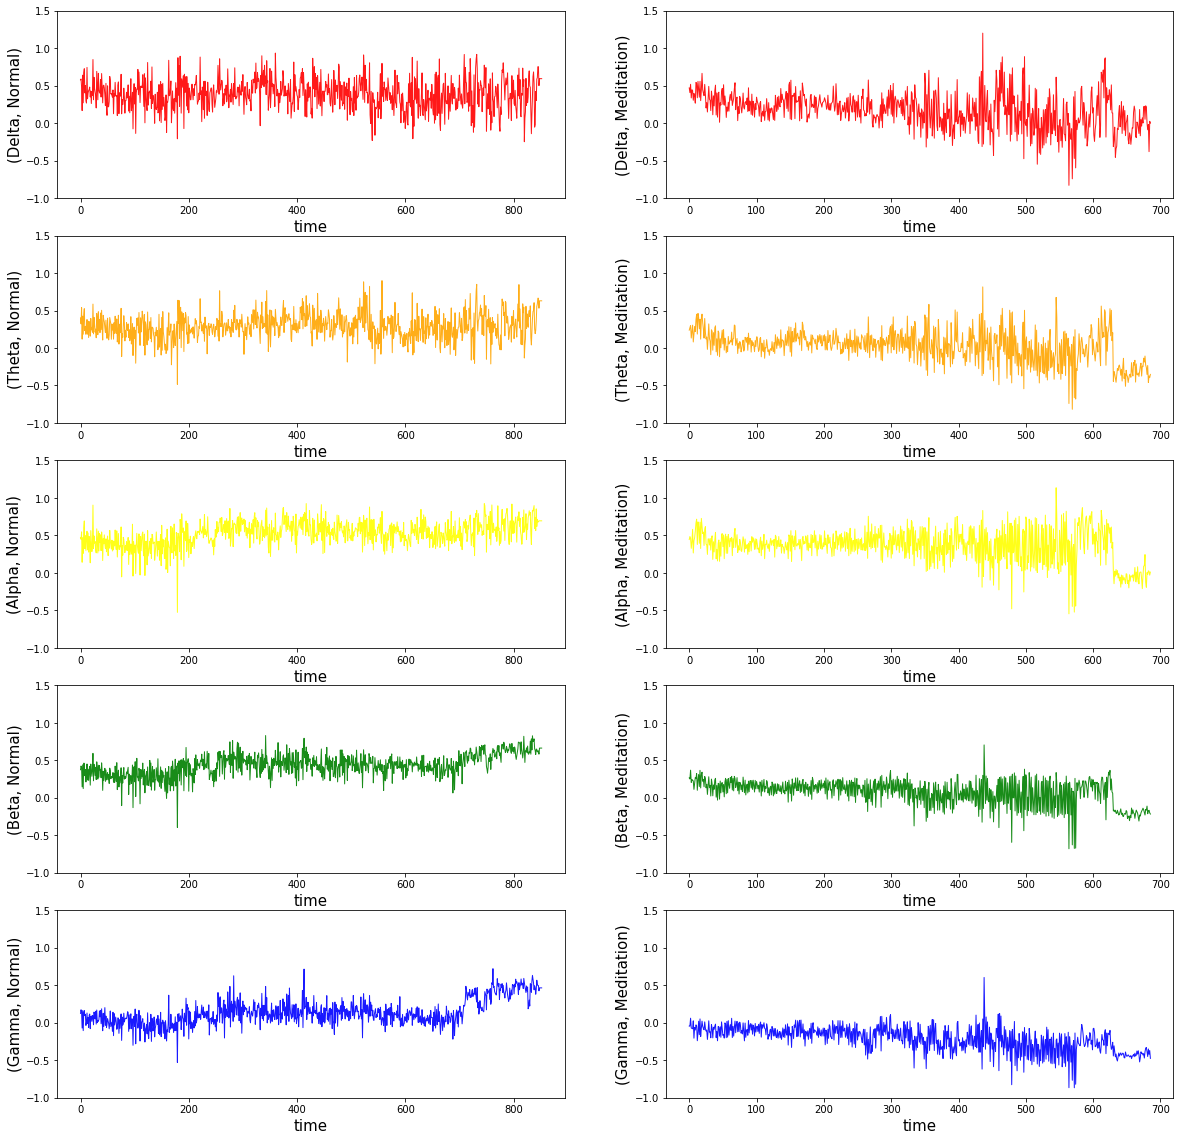

In [277]:
line_wave1(df_normal_means, df_meditation_means)

In [148]:
df_normal_means.describe()

Delta       Theta       Alpha        Beta       Gamma  Activity
count  853.000000  853.000000  853.000000  853.000000  853.000000     853.0
mean     0.386447    0.291373    0.526665    0.436151    0.142971       0.0
std      0.204734    0.176714    0.167372    0.152939    0.175140       0.0
min     -0.249026   -0.484642   -0.525955   -0.395168   -0.529150       0.0
25%      0.258505    0.182976    0.426733    0.346373    0.026993       0.0
50%      0.387446    0.283756    0.533219    0.439165    0.117650       0.0
75%      0.516195    0.398190    0.644621    0.535056    0.222706       0.0
max      0.933409    0.898448    0.925258    0.831552    0.721945       0.0

In [109]:
df_meditation_means.describe()

Delta       Theta       Alpha        Beta       Gamma  Activity
count  686.000000  686.000000  686.000000  686.000000  686.000000     686.0
mean     0.172408    0.024481    0.359033    0.074167   -0.209141       1.0
std      0.245433    0.219766    0.230329    0.177981    0.169316       0.0
min     -0.830226   -0.817138   -0.545140   -0.678489   -0.866242       1.0
25%      0.026811   -0.086088    0.245546   -0.026629   -0.316173       1.0
50%      0.181171    0.048333    0.379680    0.113125   -0.186125       1.0
75%      0.333550    0.151386    0.511163    0.208483   -0.085098       1.0
max      1.199304    0.814902    1.136160    0.706294    0.604823       1.0

#### ALPHA WAVES BEHAVIOUR : NORMAL VS MEDITATIVE STATE

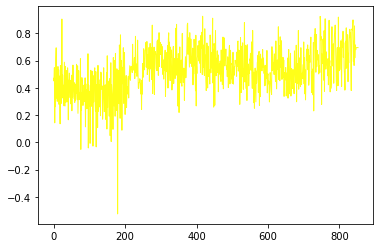

In [279]:
x = df_normal_means.index 
df_norm = df_normal_means["Alpha"]
df_med = df_meditation_means["Alpha"]

fig
ax[0].plot(x, df_norm, marker='', color= "yellow", linewidth=1, alpha=0.9, label="alpha")
ax[1].plot(x, df_med, marker='', color= "yellow", linewidth=1, alpha=0.9, label="alpha")

In [150]:
df_normal_means["Alpha"].mean()

0.5266653747074774

#### ALPHA WAVES BEHAVIOUR : MEDITATIVE STATE

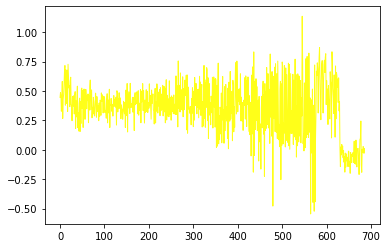

In [112]:
x = df_meditation_means.index #dataframe["TimeStamp"]
df = df_meditation_means["Alpha"]

plt.plot(x, df, marker='', color= "yellow", linewidth=1, alpha=0.9, label="alpha")#### ALPHA WAVES BEHAVIOUR & DESCRIPTIVE STATISTICS : NORMAL STATE

In [151]:
df_meditation_means["Alpha"].mean()

0.35903349155126846

## HYPOTESIS TESTING 

#### PROVING NORMALITY OF DISTRIBUTION IN BRAIN WAVES

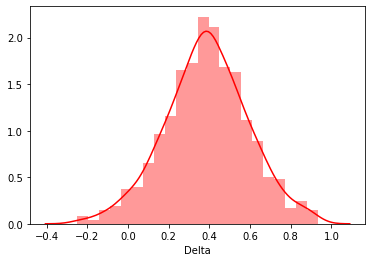

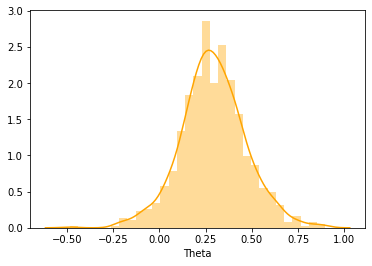

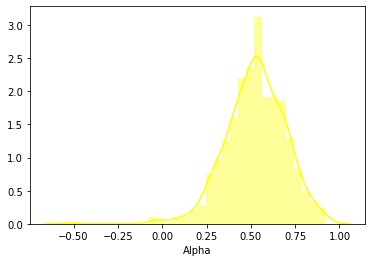

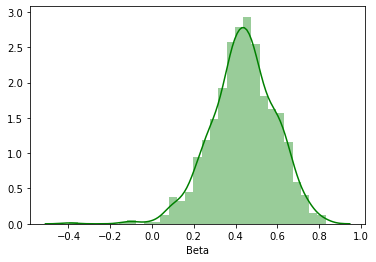

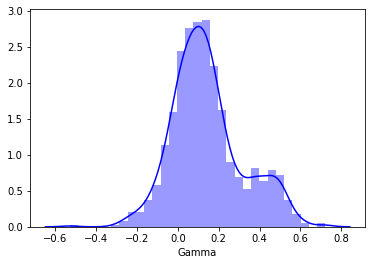

In [115]:
histogram_qq_waves(df_normal_means)

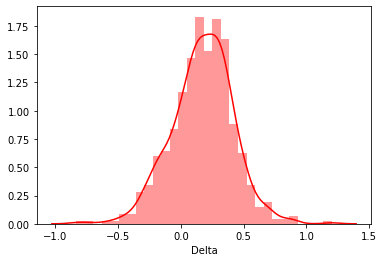

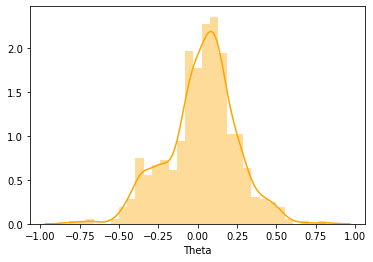

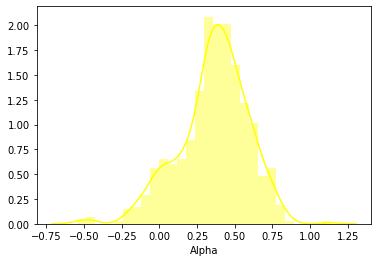

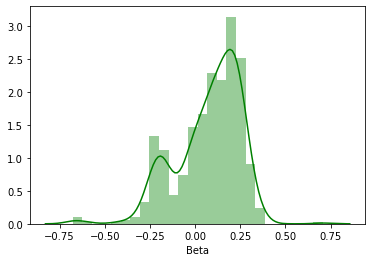

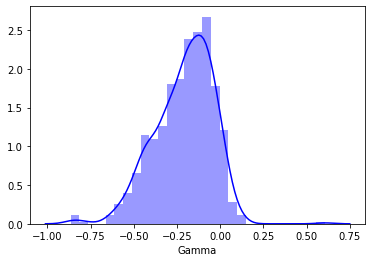

In [116]:
histogram_qq_waves(df_meditation_means)

> All Brainwaves follow a Normal Distribution. 

#### HYPOTESIS A: Alpha waves are (significantly) stronger in meditation vs normal sessions:

Hypotesis A.1: Alpha waves are (significantly) different in meditation vs normal sessions:
h0 : mu1 = mu2
h1 : mu1 != mu2

Test Description: I will use the t-test to compare the mean of two given samples as the population parameters (mean and standard deviation) are not known. I proved above the normal distribution of the samples. I will use the independent samples t-test as I am comparing the mean for two independent groups.

> Decision Rule: Accept H1 if the calculated p-value < .05.

In [119]:
M_Alpha = pd.DataFrame(df_meditation_means["Alpha"])
N_Alpha = pd.DataFrame(df_normal_means["Alpha"])
N_Alpha = N_Alpha.head(686)

result = pd.concat([M_Alpha, N_Alpha], axis=1, sort=False)
columns = ['Alpha_M', 'Alpha_N']
result.columns = columns

X = sm.add_constant(result[['Alpha_M']])
model = sm.OLS(result.Alpha_N,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Alpha_N   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.814
Date:                Tue, 10 Mar 2020   Prob (F-statistic):             0.0286
Time:                        09:44:52   Log-Likelihood:                 266.18
No. Observations:                 686   AIC:                            -528.4
Df Residuals:                     684   BIC:                            -519.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5264      0.012     45.266      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Hypotesis A.2: Alpha waves are (significantly) stronger in meditation vs normal sessions:

Alpha Waves are (significantly) stronger in meditation sessions
h0 : mu1 > mu2 

where:
mu1 : mean of alpha waves during Meditation Session
mu2 : mean of alpha waves during Normal Session

In [120]:
print(result.mean())
if result['Alpha_M'].mean() > result['Alpha_N'].mean():
    print("The Alpha Waves during meditation are significantly higher than at normal state")

Alpha_M    0.359033
Alpha_N    0.504962
dtype: float64


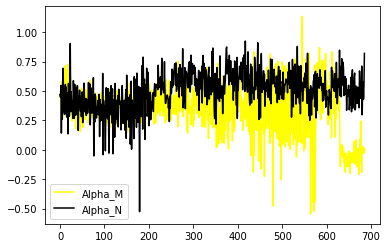

In [121]:
#Graphical representation Alpha Waves Means by timestamp Meditation vs Normal
plt.plot(result['Alpha_M'], label='Alpha_M', c=wave_to_color.get("Alpha"))
plt.plot(result['Alpha_N'], label='Alpha_N', c="black")
plt.legend()
plt.show()

> Interpretation: As the P value of the model is very low, we can reject the null hypotesis of identical average alpha waves between the sessions of Meditation against the control (Normal State). Therefore, there is significant statistical difference between the waves. Specifically, Alpha waves during meditation are stronger that at normal state.

In [122]:
#Other Solution

mu1 = df_meditation_means["Alpha"].mean()
std1 = df_meditation_means["Alpha"].std()
n1 = df_meditation_means["Alpha"].shape[0]

mu2 = df_normal_means["Alpha"].mean()
std2 = df_normal_means["Alpha"].std()
n2 = df_normal_means["Alpha"].shape[0]

from scipy import stats

t_score, p_value = stats.ttest_ind_from_stats(mu1,std1,n1, mu2,std2,n2, equal_var=False) #welch test-> not assuming equal variances in population
print(t_score, p_value)

decision_parameter = 0.05
if p_value < decision_parameter:
    print("accept H1")

-15.970303499418275 2.9289534466190446e-52
accept H1


#### HYPOTESIS B: There are more peaks of Gamma Waves in meditation vs normal session

In [123]:
M_Gamma = pd.DataFrame(df_normal_means["Gamma"]).head(447)
N_Gamma = pd.DataFrame(df_meditation_means["Gamma"])

In [124]:
result = pd.concat([M_Gamma, N_Gamma], axis=1, sort=False)
columns = ['Gamma_M', 'Gamma_N']
result.columns = columns

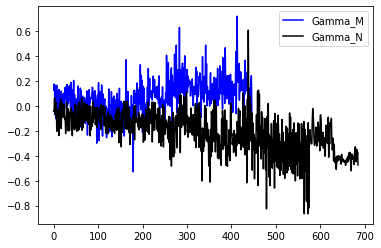

In [125]:
plt.plot(result['Gamma_M'], label='Gamma_M', c=wave_to_color.get("Gamma"))
plt.plot(result['Gamma_N'], label='Gamma_N', c="black")
plt.legend()
plt.show()

In [126]:
# ASK ALI

## MACHINE LEARNING MODEL

In [127]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve


In [128]:
ML_data = pd.concat([df_meditation_means, df_normal_means], axis=0)
ML_data 

Delta     Theta     Alpha      Beta     Gamma  Activity
0    0.468994  0.238025  0.445613  0.266148 -0.043680         1
1    0.406068  0.272445  0.486336  0.251400 -0.044371         1
2    0.517205  0.301492  0.461965  0.369813  0.061695         1
3    0.335218  0.132883  0.328254  0.206435 -0.068968         1
4    0.444095  0.223917  0.416971  0.242722 -0.074854         1
..        ...       ...       ...       ...       ...       ...
848  0.592204  0.629364  0.695148  0.664153  0.466014         0
849  0.592204  0.629364  0.695148  0.664153  0.466014         0
850  0.592204  0.629364  0.695148  0.664153  0.466014         0
851  0.592204  0.629364  0.695148  0.664153  0.466014         0
852  0.592204  0.629364  0.695148  0.664153  0.466014         0

[1539 rows x 6 columns]

## Splitting the dataframe into features and target with 80-20 split
inputs and output and then to 80% 20% split to train and test using different models.

In [129]:
X = ML_data[["Delta", "Theta", "Alpha", "Beta", "Gamma"]]
y = ML_data["Activity"]

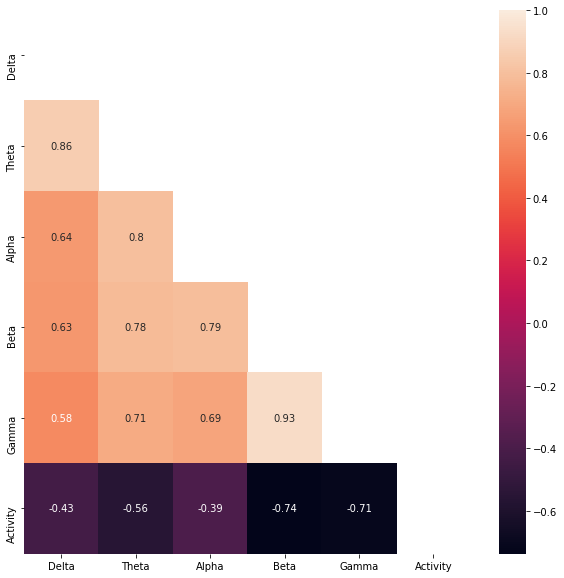

In [130]:
corr = ML_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr,mask=mask, annot=True) #?????

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , shuffle = True)

## Random Forest Regressor (RFR)

In [132]:
#Testing effect of different depth parameters on model 

r2_scores_train = []
r2_scores_test = []
max_depth_par = [2,3,4,5,6,7,8]
for parameter in max_depth_par:
    rfr = RandomForestRegressor(max_depth=parameter)
    rfr.fit(X_train, y_train)
    
    y_predict_test = rfr.predict(X_test)
    y_predict_train = rfr.predict(X_train)
    
    scores_test =  r2_score(y_test, y_predict_test)
    scores_train =  r2_score(y_train, y_predict_train)
    
    print("test: max_depth", parameter)
    print (scores_test)
    
    print("train: max_depth", parameter)
    print (scores_train)
    
    var = (scores_train-scores_test)**2
    print("absolute difference:", var)
    
    print("-------------------------------------")

    r2_scores_test.append(scores_test)
    r2_scores_train.append(scores_train)
        
plt.plot(max_depth_par, r2_scores_train, label='r2_score train')
plt.plot(max_depth_par, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

NameError: name 'RandomForestRegressor' is not defined

> Best Depth Parameters apperars to be 3 or 4

In [133]:
rfr = RandomForestClassifier(max_depth=4).fit(X_train, y_train)

rfr_y_predict = rfr.predict(X_test)

In [134]:
print(confusion_matrix(y_test, rfr_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, rfr_y_predict)}')
print(f'Precision score = {precision_score(y_test, rfr_y_predict)}')
print(f'Recall score = {recall_score(y_test, rfr_y_predict)}')
print(f'f1 score = {f1_score(y_test, rfr_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, rfr_y_predict)}')

[[141  15]
 [  5 147]]
Accuracy score = 0.935064935064935
Precision score = 0.9074074074074074
Recall score = 0.9671052631578947
f1 score = 0.9363057324840764
ROC AUC score = 0.9354757085020242


## Logistic Regressor (LR)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, lr_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, lr_y_predict)}')
print(f'Precision score = {precision_score(y_test, lr_y_predict)}')
print(f'Recall score = {recall_score(y_test, lr_y_predict)}')
print(f'f1 score = {f1_score(y_test, lr_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, lr_y_predict)}')

## K nearest neighbor (KNN)

In [ ]:
#Testing effect of different neighbor parameters on model 

neighbors_par = [1,2,3,4,5,6,7]

for neighbor in neighbors_par:
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train)
    
    knn_y_predict_test = knn.predict(X_test)
    knn_y_predict_train = knn.predict(X_train)
    
    scores_test =  r2_score(y_test, knn_y_predict_test)
    scores_train =  r2_score(y_train, knn_y_predict_train)
    
    print("test: n_neighbors", neighbor)
    print (scores_test)
    
    print("train: n_neighbors", neighbor)
    print (scores_train)
    
    var = (scores_train-scores_test)**2
    print("absolute difference:", var)
    
    print("-------------------------------------")

    r2_scores_test.append(scores_test)
    r2_scores_train.append(scores_train)
        
plt.plot(neighbors_par, r2_scores_train, label='r2_score train')
plt.plot(neighbors_par, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, knn_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, knn_y_predict)}')
print(f'Precision score = {precision_score(y_test, knn_y_predict)}')
print(f'Recall score = {recall_score(y_test, knn_y_predict)}')
print(f'f1 score = {f1_score(y_test, knn_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, knn_y_predict)}')